Table of Content

1.0 Problem Statement
    1.1 Introduction
    1.2 Data Source and Data Set
    
2.0 Load Package Data

3.0 Data Profiling (Preparing the data for analysis)
3.1 Examining the dataset
3.2 Pre-profiling
3.3 Pre-processing
3.4 Post-profiling

Questions and EDA
4.1 Find out the impact of directors on the movie
4.1.1 Does any director receive higher Revenue ?
4.1.2 Does any director's movie receive higher Rating ?
4.1.3 Does any director's movies receive higher Metascore ?
4.2 How does the runtime of movies impact them?
4.2.1 Which interval of Runtime receives higher revenue ?
4.3 How does the Genre of a movie affect the outcome of the movie ?
4.3.1 Does the total number of Genres in the movie affect the revenue, popularity, critical acclaim of the movie ?
4.3.2 What are the Genres that that bring higher Revenue, higher rating and higher critical acclaim for a movie?
4.4 Is the growth of the movie industry on the rise ?
4.4.1 Is the number of movies increasing over the years ?
4.4.2 Is the revenue from movies increasing over the years ?
4.4.3 Is the popularity of the movies increasing over the years?
4.5 What is the relationship between Revenue, Rating anfd Metascore of movies ?

5.0 Conclusion

6.0 Actionable Insights

1.0 Problem Statement

"This dataset is of 1000 movies for the 10 years 2006 to 2016. The 'X' company wanted to produce movies that gives better revenue and rating. Needs to identify the factors that will help in acheiving the same. 

1.1 Introduction

This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis.

1.2 Data Source and Data Set

a. How was it collected?

Name: "1000 movies"
Sponsoring Organization: Github
Year: 2019


2. Load Packages and Data

In [1]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\users\davender\anaconda3\lib\site-packages (4.3.0)


In [2]:
!pip install chart-studio

In [4]:
!pip install pandas-profiling

In [2]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline         

md = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")                     # Load in the dataset as md

3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?
Which variables need to be transformed in some way before they can be analyzed?

3.1.Examine the data set

In [3]:
md.dtypes                                                                       # Display the data type for each variable

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [98]:
md.head()                                                                      # Display the first five rows of the data set

rank                     genre  \
title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   
Split                       3           Horror,Thriller   
Sing                        4   Animation,Comedy,Family   
Suicide Squad               5  Action,Adventure,Fantasy   

                                                               description  \
title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   
Split                    Three girls are kidnapped by a man with a diag...   
Sing                     In a city of humanoid animals, a hustling thea...   
Suicide Squad            A secret government agency recruits some of th...   

                                     director  \
title                                           
Guardians of the Galaxy            James Gunn   
Prometheus                       Ridley Scott   
Split                      M. Night Shyamalan   
Sing                     Christophe Lourdelet   
Suicide Squad                      David Ayer   

                                                                    actors  \
title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   

                         year  runtime  rating   votes  revenue  metascore  \
title                                                                        
Guardians of the Galaxy  2014      121     8.1  757074   333.13       76.0   
Prometheus               2012      124     7.0  485820   126.46       65.0   
Split                    2016      117     7.3  157606   138.12       62.0   
Sing                     2016      108     7.2   60545   270.32       59.0   
Suicide Squad            2016      123     6.2  393727   325.02       40.0   

                          runtime_levels  Genre_count  
title                                                  
Guardians of the Galaxy  Moderately Long            3  
Prometheus                          Long            3  
Split                    Moderately Long            2  
Sing                              Medium            3  
Suicide Squad            Moderately Long            3

In [5]:
md.describe(include = 'all')                                                    # Descriptive statistics for the numerical variables

Rank     Title                    Genre  \
count   1000.000000      1000                     1000   
unique          NaN       999                      207   
top             NaN  The Host  Action,Adventure,Sci-Fi   
freq            NaN         2                       50   
mean     500.500000       NaN                      NaN   
std      288.819436       NaN                      NaN   
min        1.000000       NaN                      NaN   
25%      250.750000       NaN                      NaN   
50%      500.500000       NaN                      NaN   
75%      750.250000       NaN                      NaN   
max     1000.000000       NaN                      NaN   

                                              Description      Director  \
count                                                1000          1000   
unique                                               1000           644   
top     After they are forced to live next to a frater...  Ridley Scott   
freq                                                    1             8   
mean                                                  NaN           NaN   
std                                                   NaN           NaN   
min                                                   NaN           NaN   
25%                                                   NaN           NaN   
50%                                                   NaN           NaN   
75%                                                   NaN           NaN   
max                                                   NaN           NaN   

                                                   Actors         Year  \
count                                                1000  1000.000000   
unique                                                996          NaN   
top     Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...          NaN   
freq                                                    2          NaN   
mean                                                  NaN  2012.783000   
std                                                   NaN     3.205962   
min                                                   NaN  2006.000000   
25%                                                   NaN  2010.000000   
50%                                                   NaN  2014.000000   
75%                                                   NaN  2016.000000   
max                                                   NaN  2016.000000   

        Runtime (Minutes)       Rating         Votes  Revenue (Millions)  \
count         1000.000000  1000.000000  1.000000e+03          872.000000   
unique                NaN          NaN           NaN                 NaN   
top                   NaN          NaN           NaN                 NaN   
freq                  NaN          NaN           NaN                 NaN   
mean           113.172000     6.723200  1.698083e+05           82.956376   
std             18.810908     0.945429  1.887626e+05          103.253540   
min             66.000000     1.900000  6.100000e+01            0.000000   
25%            100.000000     6.200000  3.630900e+04           13.270000   
50%            111.000000     6.800000  1.107990e+05           47.985000   
75%            123.000000     7.400000  2.399098e+05          113.715000   
max            191.000000     9.000000  1.791916e+06          936.630000   

         Metascore  
count   936.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean     58.985043  
std      17.194757  
min      11.000000  
25%      47.000000  
50%      59.500000  
75%      72.000000  
max     100.000000

Observation:
Revenue and meta score data is missing 
Title has Unique Value - 999 instaed of 1000, looks like there is duplicate Value

In [6]:
md.sample(10)       

Rank                     Title                     Genre  \
827   828         The Warriors Gate  Action,Adventure,Fantasy   
580   581      Kickboxer: Vengeance                    Action   
18     19                      Lion           Biography,Drama   
695   696       Hachi: A Dog's Tale              Drama,Family   
993   994  Resident Evil: Afterlife   Action,Adventure,Horror   
300   301             The Equalizer     Action,Crime,Thriller   
246   247           Children of Men     Drama,Sci-Fi,Thriller   
262   263         Dear White People              Comedy,Drama   
625   626              Total Recall  Action,Adventure,Mystery   
694   695                Life of Pi   Adventure,Drama,Fantasy   

                                           Description            Director  \
827  A teenager is magically transported to China a...      Matthias Hoene   
580         A kick boxer is out to avenge his brother.      John Stockwell   
18   A five-year-old Indian boy gets lost on the st...         Garth Davis   
695  A college professor's bond with the abandoned ...     Lasse Hallström   
993  While still out to destroy the evil Umbrella C...  Paul W.S. Anderson   
300  A man believes he has put his mysterious past ...       Antoine Fuqua   
246  In 2027, in a chaotic world in which women hav...      Alfonso Cuarón   
262  The lives of four black students at an Ivy Lea...       Justin Simien   
625  A factory worker, Douglas Quaid, begins to sus...         Len Wiseman   
694  A young man who survives a disaster at sea is ...             Ang Lee   

                                                Actors  Year  \
827   Mark Chao, Ni Ni, Dave Bautista, Sienna Guillory  2016   
580  Dave Bautista, Alain Moussi, Gina Carano, Jean...  2016   
18   Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...  2016   
695  Richard Gere, Joan Allen, Cary-Hiroyuki Tagawa...  2009   
993  Milla Jovovich, Ali Larter, Wentworth Miller,K...  2010   
300  Denzel Washington, Marton Csokas, Chloë Grace ...  2014   
246  Julianne Moore, Clive Owen, Chiwetel Ejiofor,M...  2006   
262  Tyler James Williams, Tessa Thompson, Kyle Gal...  2014   
625  Colin Farrell, Bokeem Woodbine, Bryan Cranston...  2012   
694      Suraj Sharma, Irrfan Khan, Adil Hussain, Tabu  2012   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
827                108     5.3    1391                 NaN       77.0  
580                 90     4.9    6809              131.56       37.0  
18                 118     8.1  102061               51.69       69.0  
695                 93     8.1  177602                 NaN       61.0  
993                 97     5.9  140900               60.13       37.0  
300                132     7.2  249425              101.53       57.0  
246                109     7.9  382910               35.29       84.0  
262                108     6.2   21715                4.40       79.0  
625                118     6.3  210965               58.88       43.0  
694                127     7.9  471109              124.98       79.0

3.2 Pre-Profiling

In [7]:
import pandas_profiling                                                                                        
pandas_profiling.ProfileReport(md)

Initial Observation: 

Summary of data types in this dataset:
Numeric: 7 (integer)
Category: 4
Missing % - Metascore - 6.4%, and    Revenue_(millions) - 12.8%

"Revenue_(millions)" and "Metascore" will be important for the EDA. So these columns cannot be dropped.
The percentage of rows that have missing values for "Revenue (Millions) is 12.8%. This is high, so we have to fill the missing values.
The percentage of rows that have missing values for "Metascore" is around 6%. This is not so high, so we are going to drop the rows that have missing values for this column

In [8]:
# Check for duplicate values in the column 'Title'
md.Title.duplicated().any()

True

In [9]:
# Find out the movies with duplicate 'Title'
md.loc[md.Title.duplicated(keep=False)]

Rank     Title                     Genre  \
239   240  The Host  Action,Adventure,Romance   
632   633  The Host       Comedy,Drama,Horror   

                                           Description       Director  \
239  When an unseen enemy threatens mankind by taki...  Andrew Niccol   
632  A monster emerges from Seoul's Han River and f...   Bong Joon Ho   

                                                Actors  Year  \
239  Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger  2013   
632  Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...  2006   

     Runtime_(Minutes)  Rating  Votes  Revenue_(Millions)  Metascore  
239                125     5.9  96852               26.62       35.0  
632                120     7.0  73491                2.20       85.0

There are no duplicate movies. The movie with Title "The Host" was released on 2006 and 2013. So they are 2 different movies

Pre-pofiling output shows the distribution of "Revenue (Millions)" is right skewed. So let's fill these missing values with the median value

In [10]:
# Filling the missing values with the median value
median_revenue = md['Revenue_(Millions)'].median()
md['Revenue_(Millions)'].fillna(value=median_revenue, inplace=True)

In [11]:
# Check if there are anymore missing values
md['Revenue_(Millions)'].isnull().any()

False

In [12]:
# Dropping the rows that having missing values for 'Metascore'
md.dropna(subset=['Metascore'], inplace=True)

In [13]:
# Check if there are anymore missing values
md.Metascore.isnull().any()

False

3.3 Post Profiling

In [14]:
import pandas_profiling                                                                                        
pandas_profiling.ProfileReport(md)

Standardize all column to lower case

In [15]:
md.columns = map(str.lower, md.columns)                                  # map() function returns a list of results after applying the given function
                                                                         # to each item of a given iterable.
md.dtypes  

rank                    int64
title                  object
genre                  object
description            object
director               object
actors                 object
year                    int64
runtime_(minutes)       int64
rating                float64
votes                   int64
revenue_(millions)    float64
metascore             float64
dtype: object

It is a good idea to set the index of the DataFrame to movie title as the titles are unique

In [17]:
# Set the index of the DataFrame to the movie 'Title'
md.set_index('title', inplace=True)

In [18]:
md.head()

rank                     genre  \
title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   
Split                       3           Horror,Thriller   
Sing                        4   Animation,Comedy,Family   
Suicide Squad               5  Action,Adventure,Fantasy   

                                                               description  \
title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   
Split                    Three girls are kidnapped by a man with a diag...   
Sing                     In a city of humanoid animals, a hustling thea...   
Suicide Squad            A secret government agency recruits some of th...   

                                     director  \
title                                           
Guardians of the Galaxy            James Gunn   
Prometheus                       Ridley Scott   
Split                      M. Night Shyamalan   
Sing                     Christophe Lourdelet   
Suicide Squad                      David Ayer   

                                                                    actors  \
title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   

                         year  runtime_(minutes)  rating   votes  \
title                                                              
Guardians of the Galaxy  2014                121     8.1  757074   
Prometheus               2012                124     7.0  485820   
Split                    2016                117     7.3  157606   
Sing                     2016                108     7.2   60545   
Suicide Squad            2016                123     6.2  393727   

                         revenue_(millions)  metascore  
title                                                   
Guardians of the Galaxy              333.13       76.0  
Prometheus                           126.46       65.0  
Split                                138.12       62.0  
Sing                                 270.32       59.0  
Suicide Squad                        325.02       40.0

4.0 Exploratory Data Analysis and Question

4.1 Find out the impact of Director

4.1.1. Is there any relationship betweeen Director and Revenue

In [19]:
md.director.value_counts().head(10)

Ridley Scott          8
M. Night Shyamalan    6
Michael Bay           6
Paul W.S. Anderson    6
David Yates           6
Christopher Nolan     5
Peter Berg            5
Woody Allen           5
Antoine Fuqua         5
Martin Scorsese       5
Name: director, dtype: int64

In [20]:
# Top 5 directors by Revenue
revenue_directors = md.groupby('director').agg({'revenue_(millions)': 'mean', 'rank': 'count'})
top_5_revenue_directors = revenue_directors.rename(columns={'rank': 'Movies Count'}).sort_values('revenue_(millions)', ascending=False)[:5]
top_5_revenue_directors

revenue_(millions)  Movies Count
director                                         
James Cameron               760.510             1
Colin Trevorrow             652.180             1
Joss Whedon                 541.135             2
Lee Unkrich                 414.980             1
Gary Ross                   408.000             1

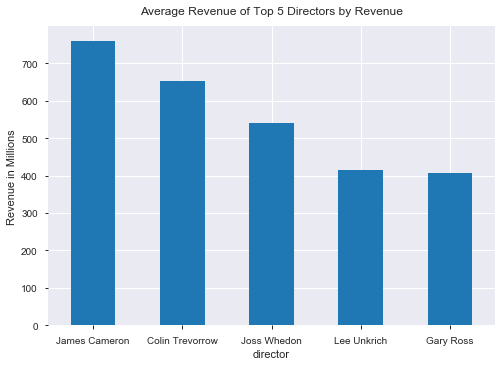

In [21]:
# Plot the result
ax = top_5_revenue_directors['revenue_(millions)'].plot.bar();
ax.set_ylabel('Revenue in Millions')
ax.set_title('Average Revenue of Top 5 Directors by Revenue', y=1.02)
ax.set_xticklabels(top_5_revenue_directors.index, rotation = 0);

4.1.2 Does any director have higher rating?

In [22]:
rating_directors = md.groupby('director').agg({'rating': 'mean', 'rank': 'count'})
top_5_rating_directors = rating_directors.rename(columns={'rank': 'Movies Count'}).sort_values('rating', ascending=False)[:5]
top_5_rating_directors

rating  Movies Count
director                                              
Christopher Nolan                   8.68             5
Makoto Shinkai                      8.60             1
Olivier Nakache                     8.60             1
Aamir Khan                          8.50             1
Florian Henckel von Donnersmarck    8.50             1

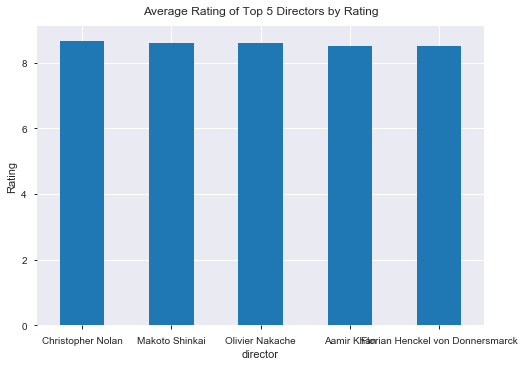

In [23]:
# Plot the result
ax = top_5_rating_directors['rating'].plot.bar();
ax.set_ylabel('Rating')
ax.set_title('Average Rating of Top 5 Directors by Rating', y=1.02)
ax.set_xticklabels(top_5_rating_directors.index, rotation = 0);

4.1.3Does any director recieve high metascore

In [24]:
meta_directors = md.groupby('director').agg({'metascore': 'mean', 'rank': 'count'})
top_5_meta_directors = meta_directors.rename(columns={'rank': 'Movies Count'}).sort_values('metascore', ascending=False)[:5]
top_5_meta_directors

metascore  Movies Count
director                                 
Barry Jenkins          99.0             1
Kenneth Lonergan       96.0             1
Todd Haynes            95.0             1
Kathryn Bigelow        94.5             2
Michael Goi            94.0             1

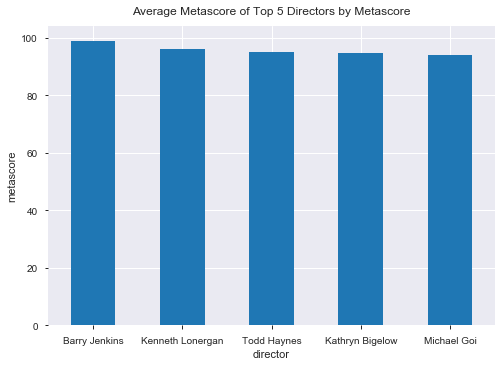

In [25]:
# Plot the result
ax = top_5_meta_directors['metascore'].plot.bar();
ax.set_ylabel('metascore')
ax.set_title('Average Metascore of Top 5 Directors by Metascore', y=1.02)
ax.set_xticklabels(top_5_meta_directors.index, rotation = 0);


Observation : Top directors evaluated based on Revenue, Rating and Metascore

4.2 How does runtime impact movies

In [26]:
md.rename(columns={'runtime_(minutes)' : 'runtime'}, inplace=True)

In [27]:
md.head()

rank                     genre  \
title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   
Split                       3           Horror,Thriller   
Sing                        4   Animation,Comedy,Family   
Suicide Squad               5  Action,Adventure,Fantasy   

                                                               description  \
title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   
Split                    Three girls are kidnapped by a man with a diag...   
Sing                     In a city of humanoid animals, a hustling thea...   
Suicide Squad            A secret government agency recruits some of th...   

                                     director  \
title                                           
Guardians of the Galaxy            James Gunn   
Prometheus                       Ridley Scott   
Split                      M. Night Shyamalan   
Sing                     Christophe Lourdelet   
Suicide Squad                      David Ayer   

                                                                    actors  \
title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   

                         year  runtime  rating   votes  revenue_(millions)  \
title                                                                        
Guardians of the Galaxy  2014      121     8.1  757074              333.13   
Prometheus               2012      124     7.0  485820              126.46   
Split                    2016      117     7.3  157606              138.12   
Sing                     2016      108     7.2   60545              270.32   
Suicide Squad            2016      123     6.2  393727              325.02   

                         metascore  
title                               
Guardians of the Galaxy       76.0  
Prometheus                    65.0  
Split                         62.0  
Sing                          59.0  
Suicide Squad                 40.0

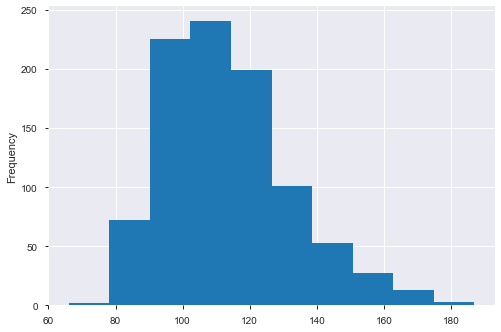

In [28]:
# Plot the distribution of the runtime column
md.runtime.plot.hist()

classify the Runtime into different levels based on the output from the describe method

Runtime(in minutes)	   Level
66-100	                         Short
100-111	                          Medium
111-123	                           Moderately Long
123-187	                          Long

In [29]:
runtime_bin_edges = [66, 100, 111, 123, 187]
runtime_bin_names = ['Short', 'Medium', 'Moderately Long', 'Long']
md['runtime_levels'] = pd.cut(md.runtime, runtime_bin_edges, labels=runtime_bin_names)
md.head()

rank                     genre  \
title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   
Split                       3           Horror,Thriller   
Sing                        4   Animation,Comedy,Family   
Suicide Squad               5  Action,Adventure,Fantasy   

                                                               description  \
title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   
Split                    Three girls are kidnapped by a man with a diag...   
Sing                     In a city of humanoid animals, a hustling thea...   
Suicide Squad            A secret government agency recruits some of th...   

                                     director  \
title                                           
Guardians of the Galaxy            James Gunn   
Prometheus                       Ridley Scott   
Split                      M. Night Shyamalan   
Sing                     Christophe Lourdelet   
Suicide Squad                      David Ayer   

                                                                    actors  \
title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   

                         year  runtime  rating   votes  revenue_(millions)  \
title                                                                        
Guardians of the Galaxy  2014      121     8.1  757074              333.13   
Prometheus               2012      124     7.0  485820              126.46   
Split                    2016      117     7.3  157606              138.12   
Sing                     2016      108     7.2   60545              270.32   
Suicide Squad            2016      123     6.2  393727              325.02   

                         metascore   runtime_levels  
title                                                
Guardians of the Galaxy       76.0  Moderately Long  
Prometheus                    65.0             Long  
Split                         62.0  Moderately Long  
Sing                          59.0           Medium  
Suicide Squad                 40.0  Moderately Long

Text(0.5, 1.02, 'Movies Count of each Runtime level')

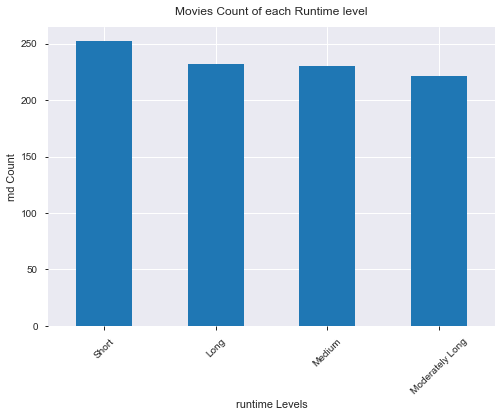

In [30]:
# Plot the count of different Runtime levels
ax = md.runtime_levels.value_counts().plot.bar();
ax.set_ylabel('md Count');
ax.set_xlabel('runtime Levels')
ax.set_xticklabels(md.runtime_levels.value_counts().index, rotation = 45);
ax.set_title('Movies Count of each Runtime level', y=1.02)

4.2.1 Which interval of Runtime receives higher revenue ?

In [31]:
runtime_stats = md.groupby('runtime_levels')['revenue_(millions)', 'rating', 'metascore'].mean()
runtime_stats

revenue_(millions)    rating  metascore
runtime_levels                                          
Short                     58.164940  6.327381  56.456349
Medium                    66.974196  6.579130  55.273913
Moderately Long           66.366244  6.848869  59.276018
Long                     132.925733  7.195690  65.021552

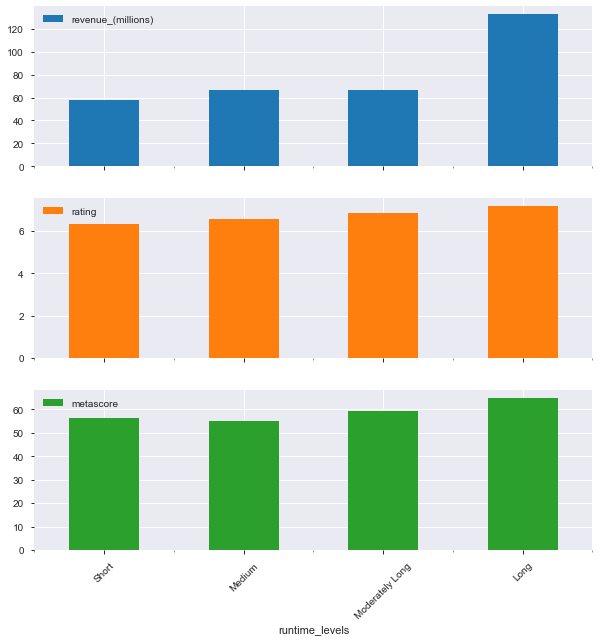

In [32]:
# Plot the above results
ax1, ax2, ax3 = runtime_stats.plot.bar(subplots=True);
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax1.set_title("")
ax2.set_title("")
ax3.set_title("")
ax3.set_xticklabels(runtime_stats.index, rotation = 45);

Observation : 
1. In general, movies that have Long Runtimes (greater than 123 minutes) earns higher Revenue, more popular and critically acclaimed.¶
2. As the Runtime increases the movies tends to earn higher Revenue and rating
3. It should be noted that, movies with Runtime (greater than 123 minutes) beats other movies in terms of Revenue by a significant margin.

In [110]:
md.rename(columns={'revenue_(millions)' : 'revenue'}, inplace=True)

In [111]:
# The Genre column contains Genre combination as string separated by comma
md['Genre_count'] = md.genre.str.split(',').str.len()

In [112]:
md.Genre_count.head()

title
Guardians of the Galaxy    3
Prometheus                 3
Split                      2
Sing                       3
Suicide Squad              3
Name: Genre_count, dtype: int64

In [113]:
# Calculate the Average Revenue, Rating and Metascore of movies based on the Genre_count
genre_count_stats = md.groupby('Genre_count')['revenue', 'rating', 'metascore'].mean()
genre_count_stats

revenue    rating  metascore
Genre_count                                
1            46.641848  6.365217  58.793478
2            55.710591  6.695455  58.677273
3            94.583734  6.794712  59.121795

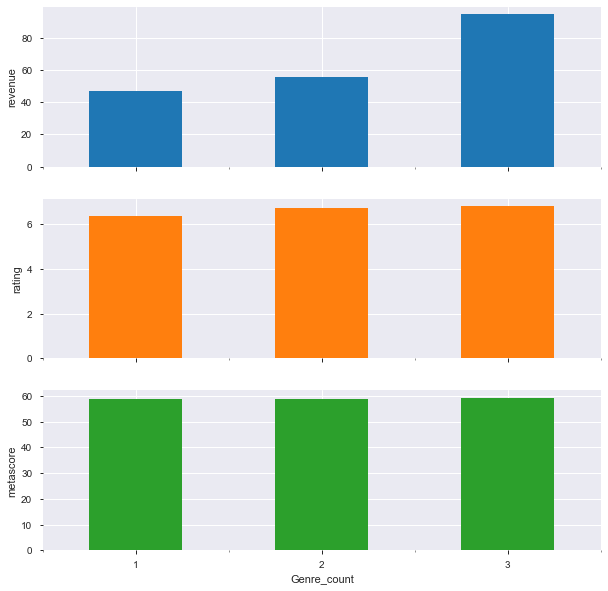

In [114]:
# Plot the results above
ax1, ax2, ax3 = genre_count_stats.plot.bar(subplots=True);
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax1.set_ylabel("revenue")
ax1.legend("")
ax1.set_title("")
ax2.set_ylabel("rating")
ax2.legend("")
ax2.set_title("")
ax3.set_ylabel("metascore")
ax3.legend("")
ax3.set_title("")
ax3.set_xticklabels(genre_count_stats.index, rotation = 0.05);


1. The number of Genres in the movie increase the Revenue of the movie significantly. On average, a movie with 3 Genres tends to earn double the revenue than a movie with only 1 Genre.
2. Interestingly, the number of Genres in a movie does not impact Rating or Metascore significantly. However both the Rating and Metascore are on the rise when Genre count increases.
3. If we think about the finding a little carefully, the Genres do not show up explicitly in a movie. Viewers are unaware of it while seeing the movie. But the number of Genres do have an impact overall to a viewer. However, when a viewer sits down to rate the movie, he does not rate based on the number of Genres in the movie. He rates it based on his likeness for the movie overall.

4.3.1 What are the Genres that that bring higher Revenue, higher rating and higher critical acclaim for a movie?
Since we know that a Genre count of 3 brings the best out a movie, lets find out which combination of 3 Genres earns more Revenue, rating and metascore

In [115]:
genre_3_df = md[md.Genre_count == 3]

In [116]:
genre_3_df = genre_3_df.groupby('genre')['revenue', 'rating', 'metascore'].mean()

In [117]:
md.head()

rank                     genre  \
title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   
Split                       3           Horror,Thriller   
Sing                        4   Animation,Comedy,Family   
Suicide Squad               5  Action,Adventure,Fantasy   

                                                               description  \
title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   
Split                    Three girls are kidnapped by a man with a diag...   
Sing                     In a city of humanoid animals, a hustling thea...   
Suicide Squad            A secret government agency recruits some of th...   

                                     director  \
title                                           
Guardians of the Galaxy            James Gunn   
Prometheus                       Ridley Scott   
Split                      M. Night Shyamalan   
Sing                     Christophe Lourdelet   
Suicide Squad                      David Ayer   

                                                                    actors  \
title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   

                         year  runtime  rating   votes  revenue  metascore  \
title                                                                        
Guardians of the Galaxy  2014      121     8.1  757074   333.13       76.0   
Prometheus               2012      124     7.0  485820   126.46       65.0   
Split                    2016      117     7.3  157606   138.12       62.0   
Sing                     2016      108     7.2   60545   270.32       59.0   
Suicide Squad            2016      123     6.2  393727   325.02       40.0   

                          runtime_levels  Genre_count  
title                                                  
Guardians of the Galaxy  Moderately Long            3  
Prometheus                          Long            3  
Split                    Moderately Long            2  
Sing                              Medium            3  
Suicide Squad            Moderately Long            3

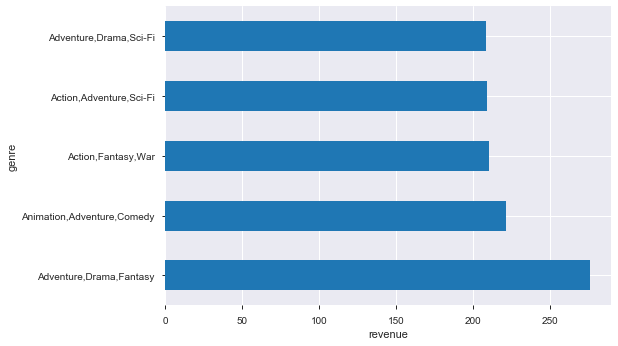

In [118]:
ax = genre_3_df.revenue.sort_values(ascending=False).head(5).plot.barh();
ax.set_xlabel('revenue');


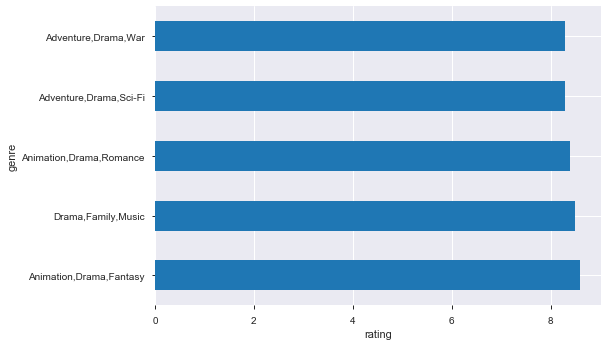

In [46]:
ax = genre_3_df.rating.sort_values(ascending=False).head(5).plot.barh();
ax.set_xlabel('rating');

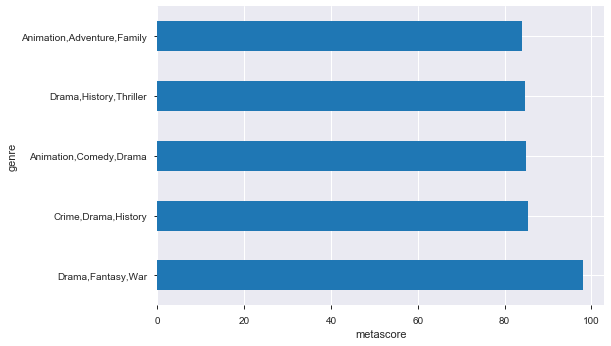

In [55]:
ax = genre_3_df.metascore.sort_values(ascending=False).head(5).plot.barh();
ax.set_xlabel('metascore');

1. The combination of Genres: Animation, Drama and Fantasy produces the highest Revenue.
2. The combination of Genres: Animation, Drama and Fantasy produces the highest Rating.
3. However, critics mostly like movies which contains the combination of Drama, Fantasy and War

4.4 Is the growth of the movie industry on the rise ?

In [56]:
md_year = md.groupby('year')['rank'].count()

In [57]:
md_year.head()

year
2006    41
2007    46
2008    49
2009    49
2010    59
Name: rank, dtype: int64

Text(0, 0.5, 'Movies Count')

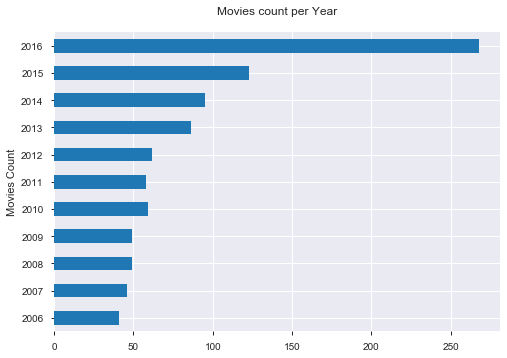

In [58]:
# Plot the movies count per year
ax = md_year.plot.barh();
ax.set_title('Movies count per Year', y=1.04)
ax.set_ylabel('Movies Count')

1 The number of movies released over the last 10 years period is showing an upward trend.
2. There is dramatic increase(more than double) in the number of movies released in 2016, when compared to the number of movies released in 2015

4.4.1 Is the revenue from movies increasing over the years ?

In [59]:
md_revenue = md.groupby('year')['revenue'].sum()

In [60]:
md_revenue.head()

year
2006    3577.480
2007    4191.230
2008    4729.205
2009    5400.330
2010    6085.620
Name: revenue, dtype: float64

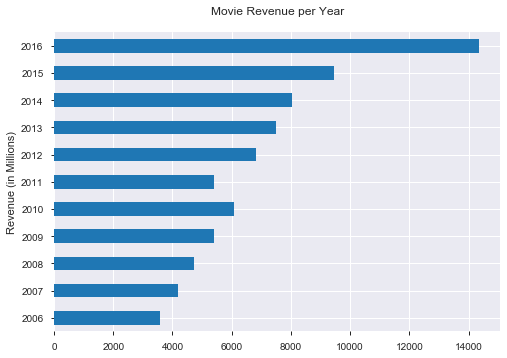

In [61]:
# Plot the Revenue for each year
ax = md_revenue.plot.barh();
ax.set_title('Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

1. The revenue from movies over the last 10 year period is showing an upward trend.
2. There is dramatic increase in the revenue from movies released in 2016, when compared to the revenue from movies released in 2015. 
This is correlating with the dramatic increase in the number of movies released in 2016 when compared to 2015, as shown in the section 4.4.1

4.4.2 Is the average revenue of the movies increasing over the years ?

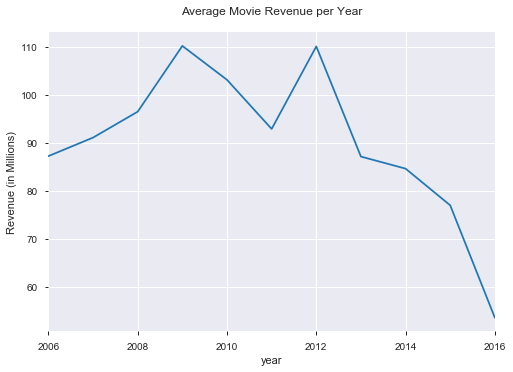

In [62]:
md_avg_revenue = md.groupby('year')['revenue'].mean()
ax = md_avg_revenue.plot.line();
ax.set_title('Average Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

1. Why is the average revenue of movies per year decreasing, while the total revenue of movies is increasing over the years?
2. This is most probably because of the fact the total number of movies released per year is increasing. This trend indicates, more producers are coming into the industry and there is huge competition in the industry. As a result, in a year, multiple movies gets released around the same time and the revenue gets distributed among them. So the average revenue of movies in a year also decreases.
3. So probably finding the Director only by the Average Revenue, Average Rating, Average Metascore may not be a good idea. For example James Cameron has only directed a single movie (Avatar in 2009) in the last 10 years. In that year(2009), only 50 movies were released, according to the 'Movies Count per Year' line graph (above). But in 2016, the trend has changed: The number of movies released in 2016 is around 5 times that of movies in 2009.
4. So we need to find out the Directors who are more active in terms of directing more movies. Among them we need to find out directors who earn more revenue, rating and metascore. So let's do that below

In [63]:
# Lets take the list of all directors who have directed total number of movies of 5 or more.
most_active_directors = md['director'].value_counts()[md['director'].value_counts() >= 5]
most_active_directors

Ridley Scott          8
M. Night Shyamalan    6
Michael Bay           6
Paul W.S. Anderson    6
David Yates           6
Christopher Nolan     5
Peter Berg            5
Woody Allen           5
Antoine Fuqua         5
Martin Scorsese       5
David Fincher         5
Justin Lin            5
Denis Villeneuve      5
J.J. Abrams           5
Danny Boyle           5
Zack Snyder           5
Name: director, dtype: int64

In [66]:
# Find out the movies of these active directors
active_director_md = md[md.director.isin(most_active_directors.index.tolist())]
active_director_md.head()

rank                     genre  \
title                                                                     
Prometheus                                  2  Adventure,Mystery,Sci-Fi   
Split                                       3           Horror,Thriller   
Fantastic Beasts and Where to Find Them    11  Adventure,Family,Fantasy   
Arrival                                    20      Drama,Mystery,Sci-Fi   
Resident Evil: The Final Chapter           35      Action,Horror,Sci-Fi   

                                                                               description  \
title                                                                                        
Prometheus                               Following clues to the origin of mankind, a te...   
Split                                    Three girls are kidnapped by a man with a diag...   
Fantastic Beasts and Where to Find Them  The adventures of writer Newt Scamander in New...   
Arrival                                  When twelve mysterious spacecraft appear aroun...   
Resident Evil: The Final Chapter         Alice returns to where the nightmare began: Th...   

                                                   director  \
title                                                         
Prometheus                                     Ridley Scott   
Split                                    M. Night Shyamalan   
Fantastic Beasts and Where to Find Them         David Yates   
Arrival                                    Denis Villeneuve   
Resident Evil: The Final Chapter         Paul W.S. Anderson   

                                                                                    actors  \
title                                                                                        
Prometheus                               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Fantastic Beasts and Where to Find Them  Eddie Redmayne, Katherine Waterston, Alison Su...   
Arrival                                  Amy Adams, Jeremy Renner, Forest Whitaker,Mich...   
Resident Evil: The Final Chapter         Milla Jovovich, Iain Glen, Ali Larter, Shawn R...   

                                         year  runtime  rating   votes  \
title                                                                    
Prometheus                               2012      124     7.0  485820   
Split                                    2016      117     7.3  157606   
Fantastic Beasts and Where to Find Them  2016      133     7.5  232072   
Arrival                                  2016      116     8.0  340798   
Resident Evil: The Final Chapter         2016      107     5.6   46165   

                                         revenue  metascore   runtime_levels  \
title                                                                          
Prometheus                                126.46       65.0             Long   
Split                                     138.12       62.0  Moderately Long   
Fantastic Beasts and Where to Find Them   234.02       66.0             Long   
Arrival                                   100.50       81.0  Moderately Long   
Resident Evil: The Final Chapter           26.84       49.0           Medium   

                                         Genre_count  
title                                                 
Prometheus                                         3  
Split                                              2  
Fantastic Beasts and Where to Find Them            3  
Arrival                                            3  
Resident Evil: The Final Chapter                   3

In [67]:
# Find out the Average Revenue, Rating and Metascore of movies directed by the above Directors
active_director_stats = active_director_md.groupby('director')['revenue', 'rating', 'metascore'].mean()
active_director_stats

revenue    rating  metascore
director                                           
Antoine Fuqua        78.642000  7.040000  52.400000
Christopher Nolan   303.018000  8.680000  74.800000
Danny Boyle          36.680000  7.420000  75.000000
David Fincher       105.544000  7.820000  78.600000
David Yates         271.751667  7.433333  68.500000
Denis Villeneuve     43.242000  7.760000  75.600000
J.J. Abrams         336.690000  7.580000  74.600000
Justin Lin          164.958000  6.820000  57.200000
M. Night Shyamalan   69.745833  5.533333  40.000000
Martin Scorsese      91.622000  7.920000  77.000000
Michael Bay         236.886667  6.483333  43.833333
Paul W.S. Anderson   34.820000  5.766667  40.333333
Peter Berg          102.266000  6.860000  57.400000
Ridley Scott         89.882500  6.850000  59.750000
Woody Allen          28.238000  7.020000  69.400000
Zack Snyder         195.148000  7.040000  48.000000

In [68]:
# Lets find out the top 5 active directors by average revenue
top_5_active_directors_by_revenue = active_director_stats.sort_values('revenue', ascending=False)
top_5_active_directors_by_revenue[:5]

revenue    rating  metascore
director                                          
J.J. Abrams        336.690000  7.580000  74.600000
Christopher Nolan  303.018000  8.680000  74.800000
David Yates        271.751667  7.433333  68.500000
Michael Bay        236.886667  6.483333  43.833333
Zack Snyder        195.148000  7.040000  48.000000

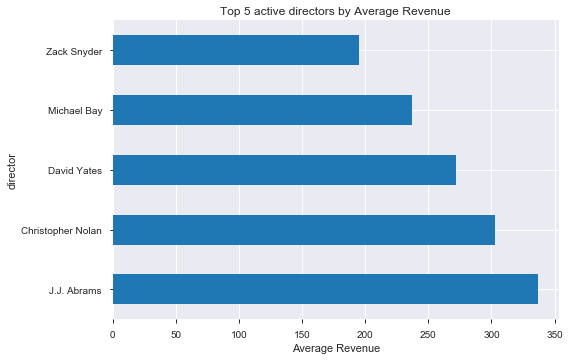

In [69]:
ax = top_5_active_directors_by_revenue[:5].revenue.plot.barh();
ax.set_title("Top 5 active directors by Average Revenue")
ax.set_xlabel('Average Revenue');

In [70]:
# Lets find out the top 5 active directors by average rating
top_5_active_directors_by_rating = active_director_stats.sort_values('rating', ascending=False)
top_5_active_directors_by_rating[:5]

revenue  rating  metascore
director                                     
Christopher Nolan  303.018    8.68       74.8
Martin Scorsese     91.622    7.92       77.0
David Fincher      105.544    7.82       78.6
Denis Villeneuve    43.242    7.76       75.6
J.J. Abrams        336.690    7.58       74.6

Text(0.5, 0, 'Average Rating')

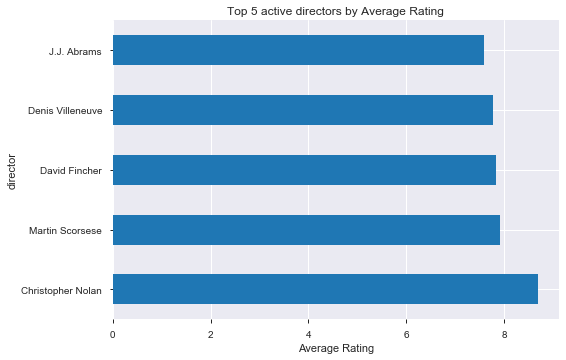

In [71]:
ax = top_5_active_directors_by_rating[:5].rating.plot.barh();
ax.set_title("Top 5 active directors by Average Rating")
ax.set_xlabel('Average Rating')

In [72]:
# Lets find out the top 5 active directors by average metascore
top_5_active_directors_by_metascore = active_director_stats.sort_values('metascore', ascending=False)
top_5_active_directors_by_metascore[:5]

revenue  rating  metascore
director                                     
David Fincher      105.544    7.82       78.6
Martin Scorsese     91.622    7.92       77.0
Denis Villeneuve    43.242    7.76       75.6
Danny Boyle         36.680    7.42       75.0
Christopher Nolan  303.018    8.68       74.8

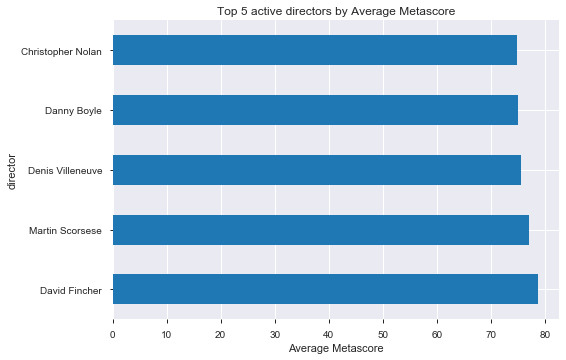

In [74]:
ax = top_5_active_directors_by_metascore[:5].metascore.plot.barh();
ax.set_title("Top 5 active directors by Average Metascore")
ax.set_xlabel('Average Metascore');

4.4.3 Is the popularity of the movies increasing over the years?

In [75]:
md_rating = md.groupby('year')['rating'].mean()
md_rating.head()

year
2006    7.143902
2007    7.130435
2008    6.716327
2009    6.944898
2010    6.820339
Name: rating, dtype: float64

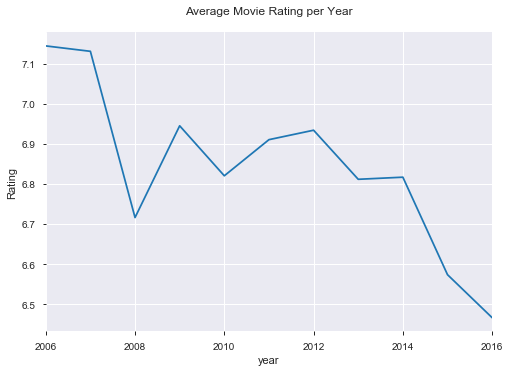

In [76]:
ax = md_rating.plot.line();
ax.set_title('Average Movie Rating per Year', y=1.04)
ax.set_ylabel('Rating');

Why is the popularity of movies in terms of IMDB rating decreasing over the years, although the revenue for the movies increasing over the years ?
Let's analyze the characteristics of movies in 2016

In [81]:
md.query('year == 2016').genre.value_counts().head(10)

Drama                         23
Comedy                        13
Comedy,Drama                  10
Horror,Thriller               10
Animation,Adventure,Comedy     9
Crime,Drama,Thriller           7
Action,Crime,Drama             7
Action,Adventure,Sci-Fi        7
Comedy,Drama,Romance           7
Action,Adventure,Fantasy       7
Name: genre, dtype: int64

The 3 most popular Genre combinations are (as found in section 4.3.2):

'Animation,Drama, Fantasy'
'Drama,Family,Music'
'Animation,Comedy,Drama'
Let's analyze the movie counts of these Genre combinations in 2016

In [84]:
md.query('year == 2016').genre.value_counts().loc['Animation,Drama,Fantasy']

1

In [86]:
'Drama,Family,Music' in md.query('year == 2016').genre.value_counts().index

False

In [88]:
'Animation,Comedy,Drama' in md.query('year == 2016').genre.value_counts().index

True

In [89]:
md.query('year == 2016').genre.value_counts().loc['Animation,Comedy,Drama']

1

In section 4.2 we saw that movies with 'Long' runtime tends to get more Rating. So Let's analyze the runtime levels for movies in 2016

In [94]:
md.query('year==2016').runtime_levels.value_counts()

Short              100
Medium              69
Moderately Long     53
Long                45
Name: runtime_levels, dtype: int64

Lets compare it with 2006

In [95]:
md.query('year == 2006').runtime_levels.value_counts()

Medium             16
Long               13
Moderately Long     9
Short               3
Name: runtime_levels, dtype: int64

1. it seems the popularity of movies in terms of rating is decreasing because of fewer number of movies with the Genre combination that could earn more rating.
2. Also the Runtime levels for movies in 2016 is more on the shorter sided. We have seen in section 4.2 that movies with 'Long' runtime level brings more rating.

4.5 What is the relationship between Revenue, Rating anfd Metascore of movies ?

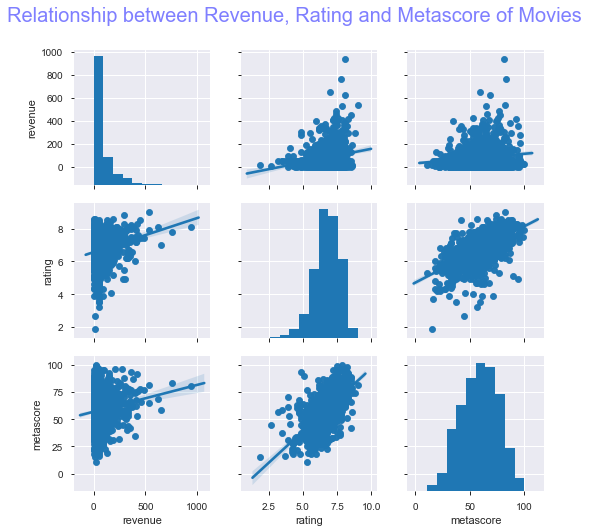

In [97]:
a=sns.pairplot(md, palette="muted",height=2.5,vars=['revenue', 'rating', 'metascore'], kind='reg');

#to change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9);

#set the title of the graph
a.fig.suptitle('Relationship between Revenue, Rating and Metascore of Movies',fontsize=20,color='b',alpha=0.5);

Rating and Metascore have strong correlation. So it means the users on Rating and Critics on Metacritic tend to agree with each other for most movies.

5. Conclusion
This section draws the conclusion from the exploration done on the dataset in Section 4.

Director

The director who has earned the highest average revenue is James Cameron. However he has directed only 1 movie in the 10 year period.
Christopher Nolan's movies are the most popular among viewers as the average rating for his movies is the highest in the 10 year period.
Critics liked Barry Jenkins's movies the most. He is closely followed by Kenneth Lonergan and Todd Haynes
Looking at the Movie Industry Trend, most active directors are more favored.
Among the most active directors, J J Abrams's movies earn more in terms of Average Revenue
Christopher Nolan is the most popular active director in terms of Average Rating among people
With respect to Directors who are most active, critics favor David Fincher in terms of Average Metascore.
Runtime

Movies with Long runtimes (> 123 minutes) earn more in terms of Revenue, Rating and Metascore.
Revenue is dramatically high for movies with Long runtimes
Genre

As the Genre count increases in a movie, its Revenue, Rating and Metascore are on the rise.
However, revenue is significantly high for movies with Genre count of 3.
Adventure as Genre is a common factor for movies that brings in more Revenue, with the Genre combination of "Adventure, Drama, Fantasy" earning the highest Revenue
The most popular Genre is Drama and the Genre combination of "Animation, Drama, Fantasy" earns the highest Rating.
Again Drama is popular among Critics as well, with the Genre combination of "Drama, Fantasy, War" earning the highest Metascore.
Industry Growth

Industry is growing with respect to number of movies released and the total revenue gained year on year.
However, the average revenue of movies year on year is showing a negative trend. This is probably because of increased competition and more movies released in the industry.
The popularity of movies is also showing a negative trend year on year. This is probably because of more movies released with Genre combinations which are unpopular among viewers.
Rating for movies in General

From the correlation graph, it is clear that People and Critics rate movies in a similar manner.
In general, movies with higher rating and metascore tend to earn more revenue as well.

6. Actionable Insights
This section describes the actions the Production company ABC should possibly take to achieve their goal as mentioned in the Problem Statement (Section 1). This is based on the conclusions drawn from the EDA done in Section 4.

Produce multiple movies with best features - The movie industry is growing very fast. More movies are released year on year and the competition is very high and the revenue is distributed among many movies. It would not be a good idea to wait for that ONE BIG MOVIE like Avatar (by James Cameron) that brings highest Revenue, Rating and Metascore. So, produce more movies using the best features (explained below) for reaping the maximum benefits.

Produce movies with active directors - those people who directs multiple moderately high budget movies. For instance, Christopher Nolan movies is certain to bring in more Revenue, Rating and Metascore.

Produce movies that have Long runtimes - Runtime greater than 2 hrs.

Produce movies with 3 Genre combination - Include a mix of Drama, Animation, Adventure, Sci-Fi, Fantasy. The movies should relate to audience with real life incidents, should move them to the edge of the seats and should enhance their imagination.

Produce movies that will satisfy both People and Critics - These movies will earn higher Revenue more often than not.
